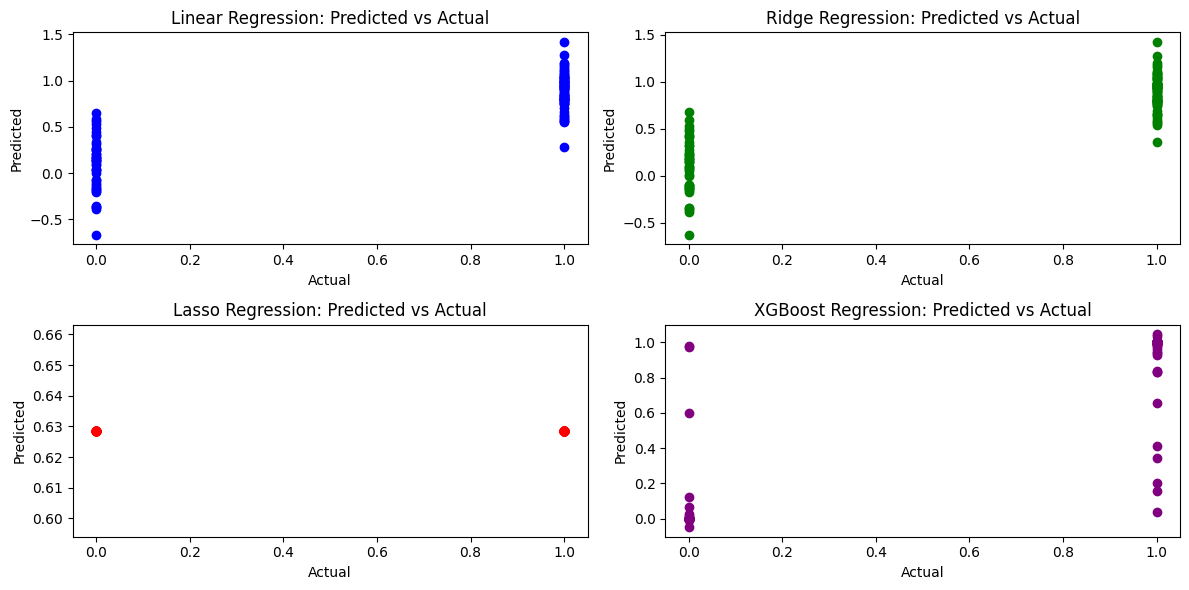

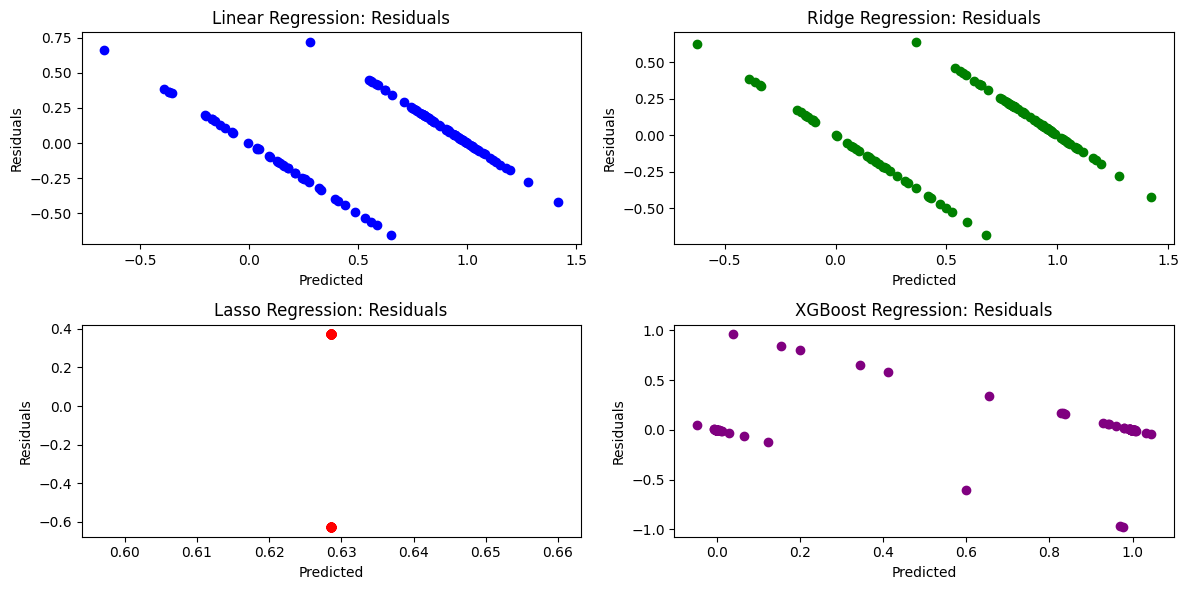

<Figure size 1000x600 with 0 Axes>

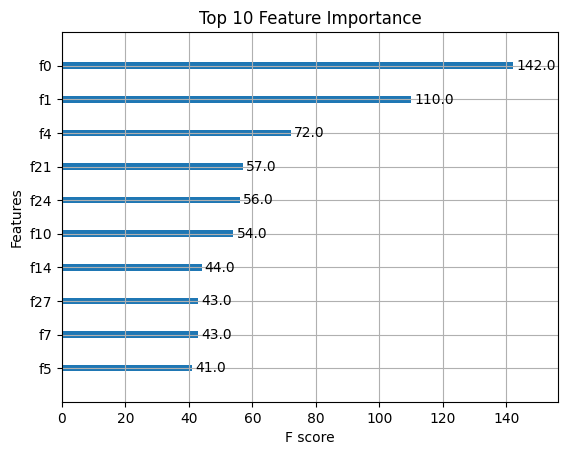

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()

# The dataset contains 30 features and the target (labels)
X = data.data  # Features
y = data.target  # Target (labels), we'll treat it as continuous for regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Linear Regression ----
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# ---- Ridge Regression ----
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# ---- Lasso Regression ----
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# ---- XGBoost Regression ----
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Evaluation metric
    'seed': 42
}

xgboost_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgboost_model.predict(dtest)

# ---- Plotting Predicted vs Actual ----
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Ridge Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green')
plt.title('Ridge Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Lasso Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lasso, color='red')
plt.title('Lasso Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_xgb, color='purple')
plt.title('XGBoost Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

# ---- Plotting Residuals ----
plt.figure(figsize=(12, 6))

# Linear Regression Residuals
plt.subplot(2, 2, 1)
residuals_linear = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals_linear, color='blue')
plt.title('Linear Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Ridge Regression Residuals
plt.subplot(2, 2, 2)
residuals_ridge = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals_ridge, color='green')
plt.title('Ridge Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Lasso Regression Residuals
plt.subplot(2, 2, 3)
residuals_lasso = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals_lasso, color='red')
plt.title('Lasso Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# XGBoost Regression Residuals
plt.subplot(2, 2, 4)
residuals_xgb = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals_xgb, color='purple')
plt.title('XGBoost Regression: Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# ---- XGBoost Feature Importance Visualization ----
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgboost_model, importance_type='weight', max_num_features=10, title='Top 10 Feature Importance')
plt.show()


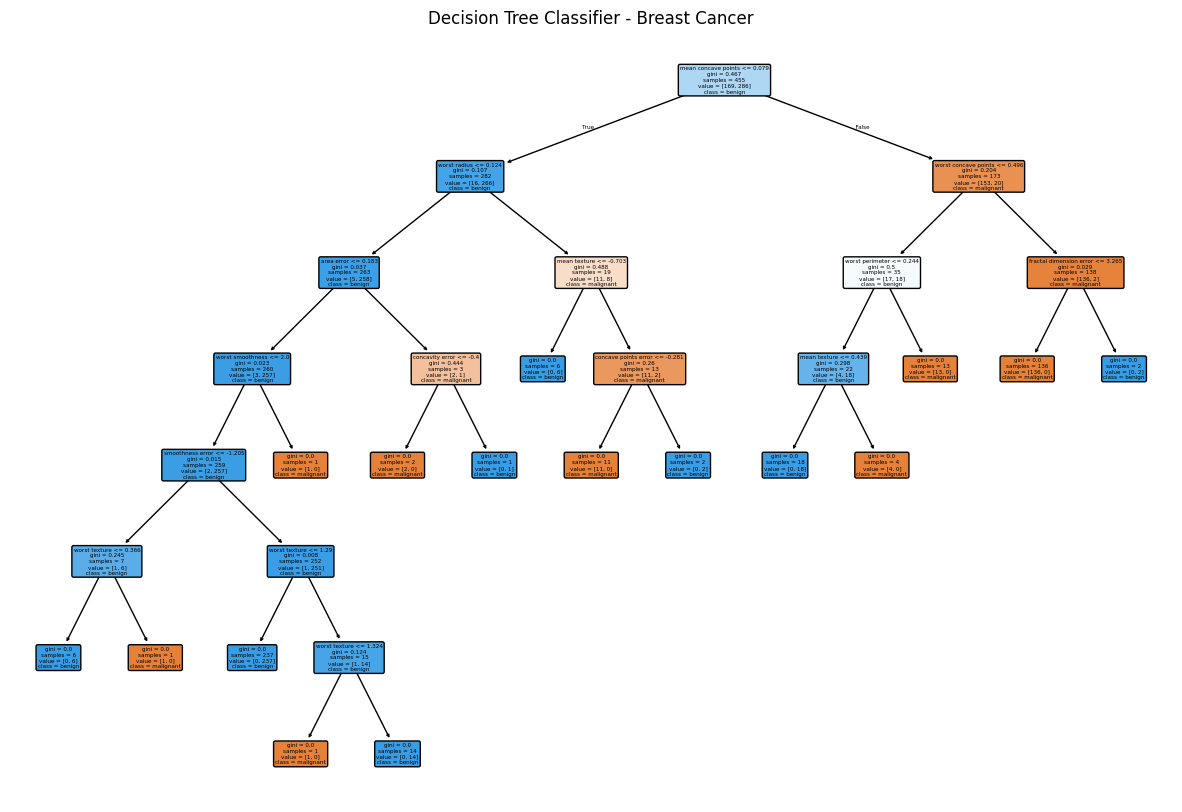

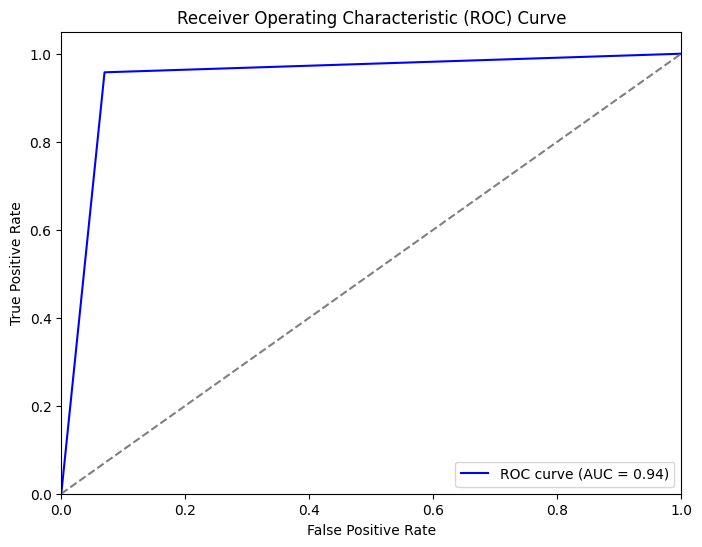

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()

# The dataset contains 30 features and the target (labels)
X = data.data  # Features
y = data.target  # Target (labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Train Decision Tree Classifier ----
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# ---- Plot Decision Tree ----
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True, proportion=False)
plt.title("Decision Tree Classifier - Breast Cancer")
plt.show()

# ---- ROC Curve ----
# Predict probabilities for ROC Curve
y_prob = tree_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Linear Regression: MSE = 0.06, R² = 0.73, Accuracy = 0.95
Ridge Regression: MSE = 0.06, R² = 0.74, Accuracy = 0.95
Lasso Regression: MSE = 0.23, R² = -0.00, Accuracy = 0.62
XGBoost Regression: MSE = 0.05, R² = 0.79, Accuracy = 0.93


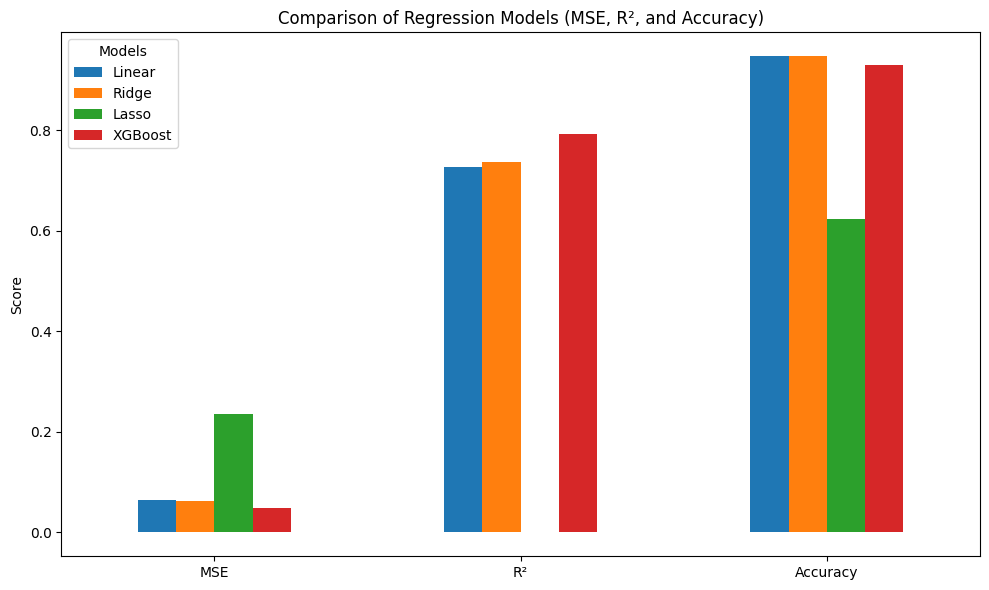

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()

# The dataset contains 30 features and the target (labels)
X = data.data  # Features
y = data.target  # Target (labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Linear Regression ----
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# ---- Ridge Regression ----
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# ---- Lasso Regression ----
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# ---- XGBoost Regression ----
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Evaluation metric
    'seed': 42
}

xgboost_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgboost_model.predict(dtest)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# ---- Accuracy (For Classification) ----
# Since this is a binary classification task, let's compute accuracy
# For classification, we will convert predicted values to binary (0 or 1)
accuracy_linear = accuracy_score(y_test, np.round(y_pred_linear))
accuracy_ridge = accuracy_score(y_test, np.round(y_pred_ridge))
accuracy_lasso = accuracy_score(y_test, np.round(y_pred_lasso))
accuracy_xgb = accuracy_score(y_test, np.round(y_pred_xgb))

# ---- Print Results ----
print(f"Linear Regression: MSE = {mse_linear:.2f}, R² = {r2_linear:.2f}, Accuracy = {accuracy_linear:.2f}")
print(f"Ridge Regression: MSE = {mse_ridge:.2f}, R² = {r2_ridge:.2f}, Accuracy = {accuracy_ridge:.2f}")
print(f"Lasso Regression: MSE = {mse_lasso:.2f}, R² = {r2_lasso:.2f}, Accuracy = {accuracy_lasso:.2f}")
print(f"XGBoost Regression: MSE = {mse_xgb:.2f}, R² = {r2_xgb:.2f}, Accuracy = {accuracy_xgb:.2f}")

# ---- Comparison Plot ----
metrics = ['MSE', 'R²', 'Accuracy']
linear_scores = [mse_linear, r2_linear, accuracy_linear]
ridge_scores = [mse_ridge, r2_ridge, accuracy_ridge]
lasso_scores = [mse_lasso, r2_lasso, accuracy_lasso]
xgb_scores = [mse_xgb, r2_xgb, accuracy_xgb]

# Create a DataFrame for easier plotting
scores_df = pd.DataFrame({
    'Linear': linear_scores,
    'Ridge': ridge_scores,
    'Lasso': lasso_scores,
    'XGBoost': xgb_scores
}, index=metrics)

# Plot comparison bar chart
scores_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Regression Models (MSE, R², and Accuracy)")
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.tight_layout()
plt.show()


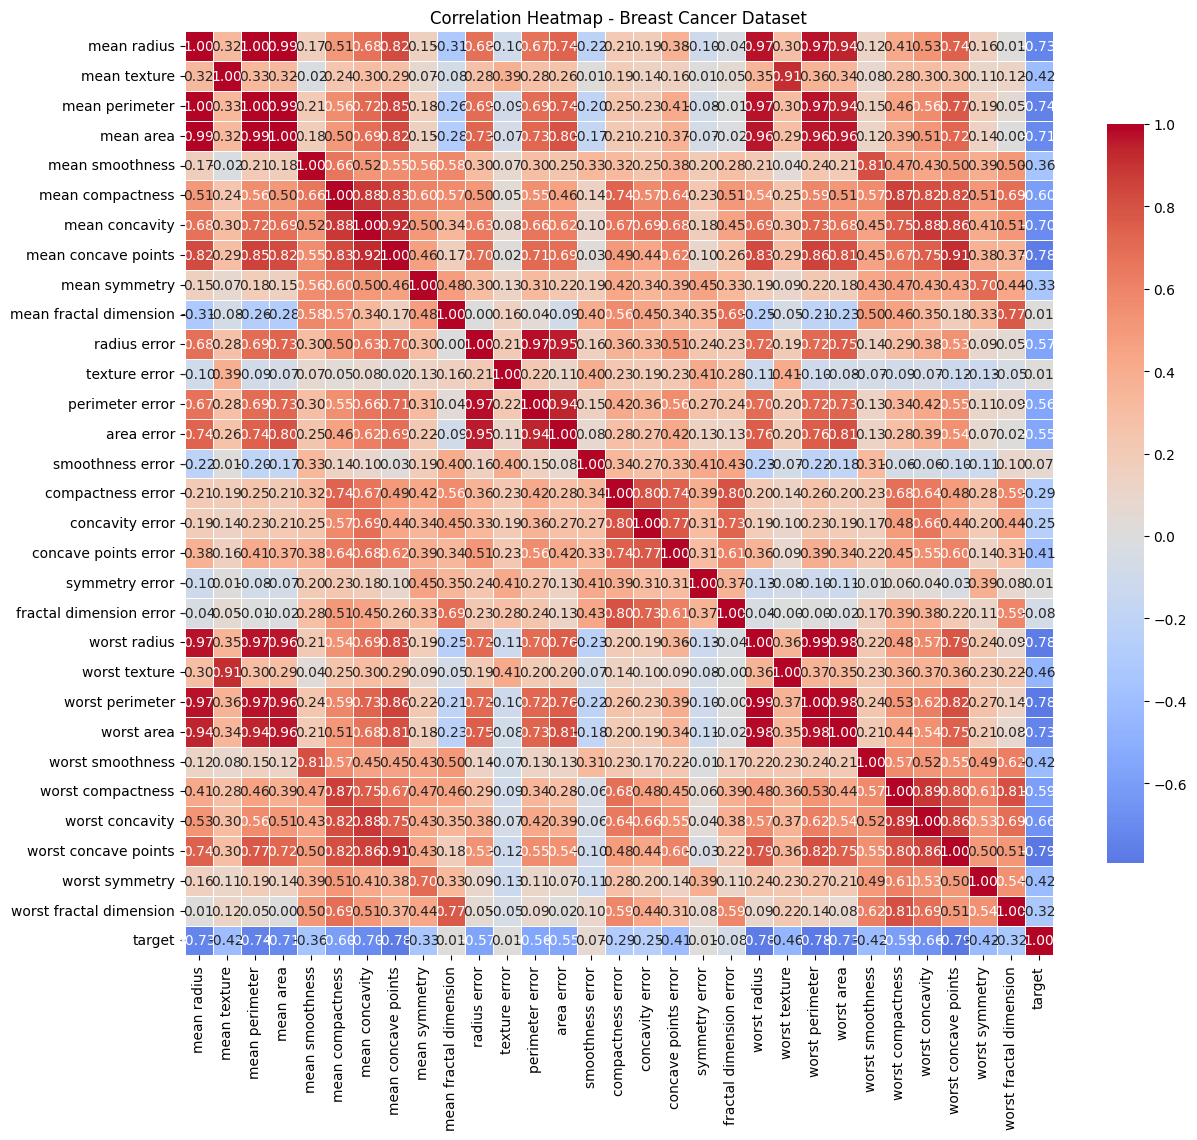

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adding the target column (binary: 0 or 1)

# ---- Heatmap: Correlation Matrix ----
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap - Breast Cancer Dataset")
plt.show()



In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adding the target column (binary: 0 or 1)


# ---- Pair Plot ----
# Create a pairplot to visualize pairwise relationships
sns.pairplot(df, hue='target', palette='coolwarm', markers=["o", "s"], diag_kind='kde', height=2.5)
plt.suptitle("Pair Plot of Features with Target Class", y=1.02)
plt.show()